In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [24]:
diabetes = datasets.load_diabetes()

print("Признаки:", diabetes.feature_names)
print("Размерность X:", diabetes.data.shape)
print("Размерность y:", diabetes.target.shape)

Признаки: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Размерность X: (442, 10)
Размерность y: (442,)


In [25]:
# выбирем  bmi -индекс массы тела 
X = diabetes.data[:, np.newaxis, 2]  
y = diabetes.target

print("Пример X:", X[:5])
print("Пример y:", y[:5])

Пример X: [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]
Пример y: [151.  75. 141. 206. 135.]


In [26]:
# Создаем и обучаем модель
model = LinearRegression()
model.fit(X, y)
w_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print("Коэффициент:", w_sklearn)
print("Смещение:", b_sklearn)

# предсказания
y_pred_sklearn = model.predict(X)


Коэффициент: 949.4352603840388
Смещение: 152.13348416289617


In [27]:
X_flat = X.flatten()
X_mean = np.mean(X_flat)
y_mean = np.mean(y)

# коэффициенты вручную 
w_manual = np.sum((X_flat - X_mean) * (y - y_mean)) / np.sum((X_flat - X_mean)**2)
b_manual = y_mean - w_manual * X_mean

print("'Ручной' коэффициент:", w_manual)
print("'Ручное' смещение:", b_manual)

# предсказания 
y_pred_manual = w_manual * X_flat + b_manual


'Ручной' коэффициент: 949.4352603840387
'Ручное' смещение: 152.13348416289617


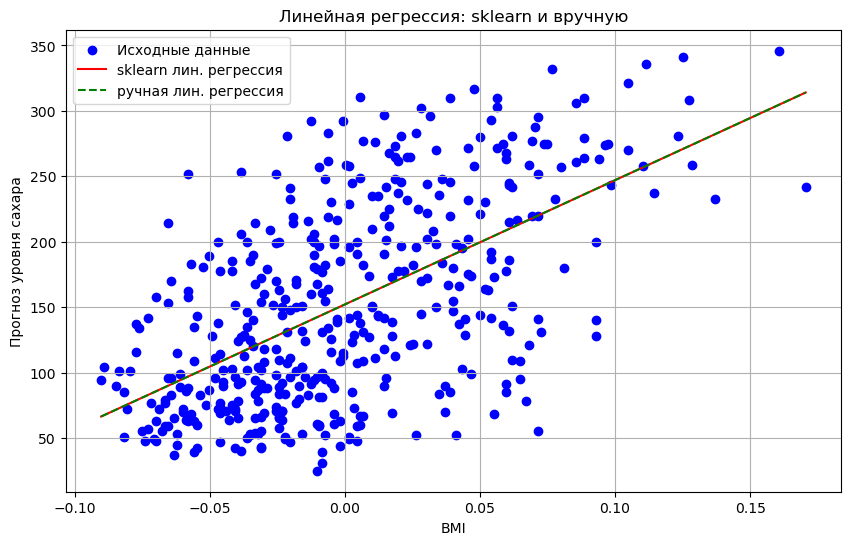

In [28]:
# сортировка для правильной отрисовки 
sorted_idx = np.argsort(X_flat)
X_sorted = X_flat[sorted_idx]
y_sklearn_sorted = y_pred_sklearn[sorted_idx]
y_manual_sorted = y_pred_manual[sorted_idx]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Исходные данные')
plt.plot(X_sorted, y_sklearn_sorted, color='red', label='sklearn лин. регрессия')
plt.plot(X_sorted, y_manual_sorted, color='green', linestyle='--', label='ручная лин. регрессия')
plt.xlabel('BMI')
plt.ylabel('Прогноз уровня сахара')
plt.title('Линейная регрессия: sklearn и вручную')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# DataFrame с результатами
results = pd.DataFrame({
    'BMI': X_flat,
    'Истинное значение': y,
    'Предсказание (sklearn)': y_pred_sklearn,
    'Предсказание (ручное)': y_pred_manual
})
results.head(10)

,BMI,Истинное значение,Предсказание (sklearn),Предсказание (ручное)
0,0.061696,151.0,210.710038,210.710038
1,-0.051474,75.0,103.262195,103.262195
2,0.044451,141.0,194.337033,194.337033
3,-0.011595,206.0,141.124769,141.124769
4,-0.036385,135.0,117.588574,117.588574
5,-0.040696,97.0,113.495323,113.495323
6,-0.047163,138.0,107.355447,107.355447
7,-0.001895,63.0,150.334584,150.334584
8,0.061696,110.0,210.710038,210.710038
9,0.039062,310.0,189.220470,189.220470
